<a href="https://colab.research.google.com/github/HerrWolf201/Deep-Learning-Projects/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**



In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


### **Load and Preprocess the MNIST Dataset**


In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape to add a channel dimension (since MNIST is grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of the data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


### **Build the CNN Model**

In [3]:
model = Sequential([
    # Convolutional layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Compile the Model**

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### **Train the Model**

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.7780 - loss: 0.6922 - val_accuracy: 0.9743 - val_loss: 0.0835
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9631 - loss: 0.1246 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.9749 - loss: 0.0855 - val_accuracy: 0.9861 - val_loss: 0.0487
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9804 - loss: 0.0661 - val_accuracy: 0.9883 - val_loss: 0.0412
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step - accuracy: 0.9831 - loss: 0.0553 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9857 - loss: 0.0460 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.9868 - val_loss: 0.0437
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9888 - loss: 0

### **Evaluate the Model**

In [6]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 2s - 7ms/step - accuracy: 0.9920 - loss: 0.0268
Test Accuracy: 99.20%


### **Visualize Model Performance**

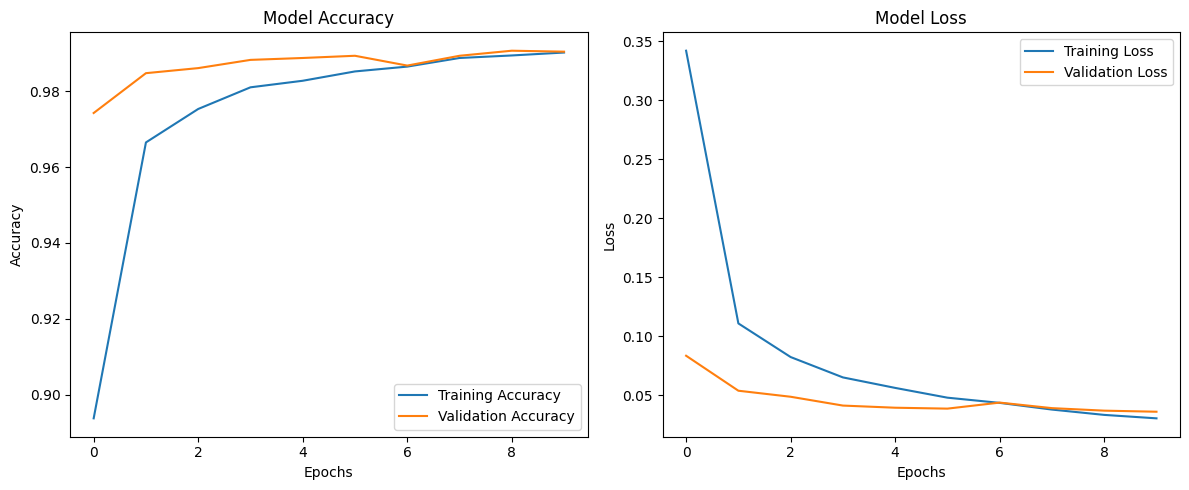

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()



### **Test Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


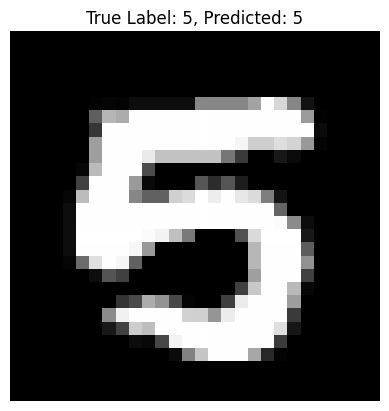

In [18]:
# Predict on a random test image
random_idx = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_idx]
true_label = np.argmax(y_test[random_idx])

# Predict using the model
predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

# Display the image and prediction
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()
